Import Library

In [2]:
# https://www.rumah.com/rumah-dijual/di-area-denpasar-idba06/1

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import importlib
import pandas as pd
import pylab as pl
import numpy as np
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

warnings.filterwarnings("ignore")

Import Data and show the first 5 data rows. It appears that the data has 6 information, such as:
* description (deskripsi)
* land area (luas tanah)
* building area (luas bangunan)
* numbers of bedrooms (jumlah kamar)
* numbers of toilets (jumlah WC)
* price (harga)

In [3]:
df = pd.read_csv("data/rumah_data.csv")

# take a look at the dataset
df.head()

,deskripsi,luas_tanah(m2),luas_bangunan(m2),jumlah_kamar,jumlah_WC,harga
0,"Rumah baru lantai 1 di Jalan Kargo Permai , De...",115,110,3,2,1.550000e+09
1,Rumah minimalis di ayani utara denpasarLT: 80 ...,80,50,3,1,5.600000e+08
2,"Rumah murah di Denpasar , Ubung Kaja , Cokroam...",100,37,2,1,8.500000e+08
3,MODERN PRESTIGE HOUSE! Perumahan Bali Arum Den...,300,228,3,3,3.100000e+09
4,Rumah Denpasar Bali Lingkungan Elit Full Furni...,600,650,5,5,1.650000e+10


Delete the description column because this information will not be used in prediction model. Lost data will also be deleted in this process

In [4]:
df = df.dropna()
df = df.drop(columns=['deskripsi'])
df.head()

,luas_tanah(m2),luas_bangunan(m2),jumlah_kamar,jumlah_WC,harga
0,115,110,3,2,1.550000e+09
1,80,50,3,1,5.600000e+08
2,100,37,2,1,8.500000e+08
3,300,228,3,3,3.100000e+09
4,600,650,5,5,1.650000e+10


Data has 5 columns and 744 rows

In [5]:
df.shape

(744, 5)

Data summary

In [6]:
df.describe()

,luas_tanah(m2),luas_bangunan(m2),jumlah_kamar,jumlah_WC,harga
count,744.000000,744.000000,744.000000,744.000000,7.440000e+02
mean,292.764785,198.251344,3.622312,2.952957,4.262762e+09
std,1840.268662,177.972785,1.870242,2.013866,3.593656e+10
min,50.000000,10.000000,1.000000,1.000000,1.300000e+06
25%,100.000000,80.000000,3.000000,2.000000,9.250000e+08
50%,132.000000,150.000000,3.000000,3.000000,1.650000e+09
75%,247.500000,250.000000,4.000000,4.000000,2.992500e+09
max,49950.000000,1200.000000,27.000000,27.000000,9.750000e+11


Data histogram

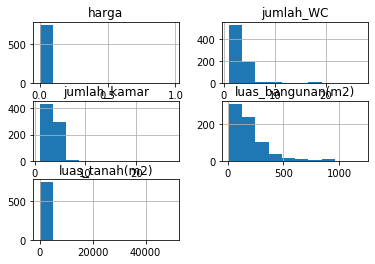

In [7]:
df.hist()
plt.show()

In [8]:
X = np.asarray(df.drop(columns=['harga']))
print(X[0:5])
print(X.shape)

[[115 110   3   2]
 [ 80  50   3   1]
 [100  37   2   1]
 [300 228   3   3]
 [600 650   5   5]]
(744, 4)


In [9]:
Y = np.asarray(df[['harga']])
Y = Y.reshape(Y.shape[0])
print(Y[0:5])
print(Y.shape)

[1.55e+09 5.60e+08 8.50e+08 3.10e+09 1.65e+10]
(744,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (595, 4) (595,)
Test set: (149, 4) (149,)


In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-8.54012325e-02, -1.04388584e-01,  1.88257744e-01,
         2.37727909e-02],
       [-8.68639331e-02, -1.33058824e-01, -3.23218775e-01,
         4.95266477e-01],
       [ 5.01141732e-01,  4.02412595e+00,  3.25711686e+00,
         3.32422860e+00],
       [-1.16117946e-01, -7.92474340e-01, -8.34695295e-01,
        -4.47720896e-01],
       [-9.85655384e-02, -7.12197668e-01, -3.23218775e-01,
        -4.47720896e-01],
       [-1.01490940e-01, -7.35133860e-01, -3.23218775e-01,
        -4.47720896e-01],
       [-1.01490940e-01, -7.63804100e-01, -3.23218775e-01,
        -4.47720896e-01],
       [-1.11242277e-01, -8.61282915e-01, -8.34695295e-01,
        -9.19214582e-01],
       [-1.01490940e-01, -6.77793381e-01, -3.23218775e-01,
        -9.19214582e-01],
       [ 1.16245779e-02,  1.15710197e+00,  1.72268730e+00,
         9.66760164e-01],
       [-2.83559068e-02,  8.70399570e-01,  6.99734264e-01,
         4.95266477e-01],
       [-1.16117946e-01, -9.30091491e-01, -8.34695295e-01,
      

In [12]:
ly_best = 4
nr_best = 62
alpha_best = 0.05
solver_best = 'lbfgs'
mae_best = 1e10

In [71]:
a = 1
for i in range(0,1000):
    ly = np.random.randint(1,5)
    nr = np.random.randint(5,100)
    clf = MLPRegressor(solver=solver_best, alpha=alpha_best,
                       hidden_layer_sizes=(nr, ly), random_state=1, 
                       max_iter=1000, activation='relu')
    clf.fit(X_train,Y_train)
    yhat = clf.predict(X_train)
    mae = mean_absolute_error(Y_train, yhat)
    if(mae < mae_best):
        mae_best = mae
        ly_best = ly
        nr_best = nr
    a = a + 1
    
print(' ')
print("Jumlah Hidden Optimal: ", ly_best)
print("Jumlah Neuron Optimal: ", nr_best)
print("MAE terendah:", mae_best)

 
Jumlah Hidden Optimal:  4
Jumlah Neuron Optimal:  62
MAE terendah: 702727863.4306124


In [72]:
alpha_test = [1e-5, 5e-5, 1e-4, 5e-4, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
solver_test = ['lbfgs', 'sgd', 'adam']

a = 1
for i in range(len(alpha_test)):
    for j in range(len(solver_test)):
        clf = MLPRegressor(solver=solver_test[j], alpha=alpha_test[i],
                           hidden_layer_sizes=(nr_best, ly_best), random_state=1, 
                           max_iter=1000, activation='relu')
        clf.fit(X_train,Y_train)
        yhat = clf.predict(X_train)
        mae = mean_absolute_error(Y_train, yhat)
        if(mae < mae_best):
            mae_best = mae
            alpha_best = alpha_test[i]
            solver_best = solver_test[j]
        a = a + 1
    
print(' ')
print("Learning Rate terbaik: ", alpha_best)
print("Optimisasi terbaik: ", solver_best)
print("MAE terendah:", mae_best)

 
Learning Rate terbaik:  0.05
Optimisasi terbaik:  lbfgs
MAE terendah: 702727863.4306124


In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

clf = MLPRegressor(solver=solver_best, alpha=alpha_best,
                   hidden_layer_sizes=(nr_best, ly_best), random_state=1, 
                   max_iter=1000, activation='relu')
clf.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(62, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
yhat = clf.predict(X_train)
mae = mean_absolute_error(Y_train, yhat)

print("MAE: ", mae)
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_train - yhat) ** 2))
print("R2-score: %.2f" % r2_score(Y_train, yhat))

MAE:  702727863.4306124
Residual sum of squares (MSE): 1605084643127997440.00
R2-score: 0.93


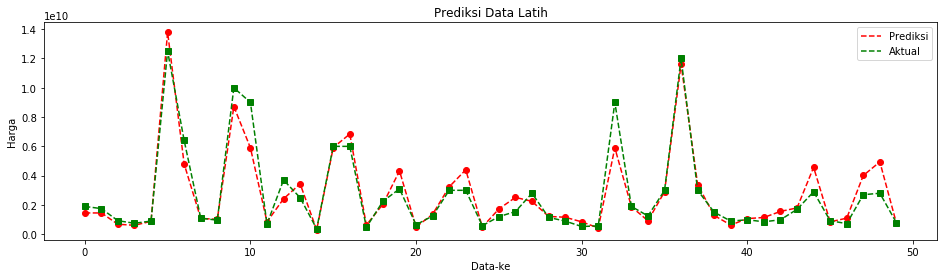

In [15]:
t = np.arange(Y_train.shape[0])

plt.figure(figsize=(16,4))
plt.title('Prediksi Data Latih')
#plt.xticks(t, tahun_t, rotation='vertical')
plt.plot(t[0:50], yhat[0:50], 'ro')
plt.plot(t[0:50], yhat[0:50], 'r--', label='Prediksi')
plt.plot(t[0:50], Y_train[0:50], 'gs')
plt.plot(t[0:50], Y_train[0:50], 'g--', label='Aktual')
plt.xlabel('Data-ke', fontsize=10)
plt.ylabel('Harga', fontsize=10)
plt.legend()
plt.show()

In [16]:
# Data Test

yhat = clf.predict(X_test)
mae = mean_absolute_error(Y_test, yhat)

print("MAE: ", mae)
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_test - yhat) ** 2))
print("R2-score: %.2f" % r2_score(Y_test, yhat))

MAE:  7254292497.058576
Residual sum of squares (MSE): 6370400616878577811456.00
R2-score: -0.01


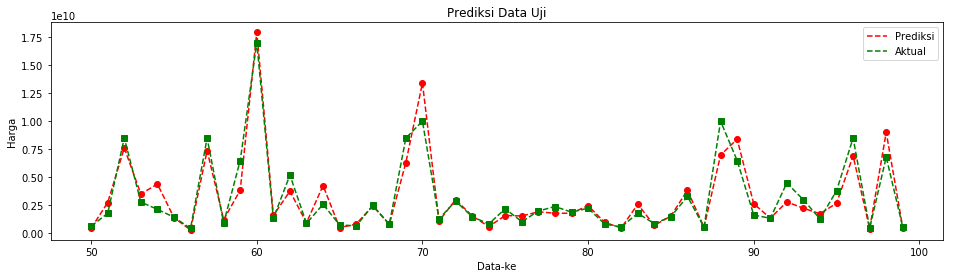

In [17]:
t = np.arange(Y_test.shape[0])

plt.figure(figsize=(16,4))
plt.title('Prediksi Data Uji')
#plt.xticks(t, tahun_t, rotation='vertical')
plt.plot(t[50:100], yhat[50:100], 'ro')
plt.plot(t[50:100], yhat[50:100], 'r--', label='Prediksi')
plt.plot(t[50:100], Y_test[50:100], 'gs')
plt.plot(t[50:100], Y_test[50:100], 'g--', label='Aktual')
plt.xlabel('Data-ke', fontsize=10)
plt.ylabel('Harga', fontsize=10)
plt.legend()
plt.show()

In [18]:
df2 = pd.read_csv("data/rumah_data_baru.csv")
df2 = df2.dropna()
df2 = df2.drop(columns=['deskripsi'])
df2.head()

,luas_tanah(m2),luas_bangunan(m2),jumlah_kamar,jumlah_WC
0,150,147,3,2
1,90,140,4,2
2,112,112,4,2
3,145,125,3,2
4,115,100,3,3


In [19]:
X_predict = np.asarray(df2)
scaler.transform(X_predict)
yhat_predict = clf.predict(X_predict)

yhat_predict

array([1.75909946e+09, 1.02603620e+09, 1.05438192e+09, 1.59939859e+09,
       1.49498721e+09, 6.86750961e+08, 1.94819369e+09, 6.02422309e+08,
       6.28816654e+08, 1.55916297e+09, 6.96373960e+09, 2.14363841e+09,
       1.55916297e+09, 5.64468137e+09, 2.51117474e+09, 6.21535256e+09,
       1.59790869e+09, 1.01041673e+09, 4.16450234e+09, 6.02422309e+08,
       3.54437268e+08, 3.44808553e+08, 3.23905839e+09, 6.05981603e+08,
       8.80736322e+08, 1.25527241e+09, 1.55916297e+09, 6.64199966e+09,
       3.25190344e+09, 3.07038204e+09, 2.67666779e+09, 1.97095100e+09,
       1.54255766e+09, 6.45200038e+09, 5.33210679e+09, 5.78844036e+08,
       3.36887222e+09, 6.86750961e+08, 1.49498721e+09, 4.09959682e+09,
       1.54677184e+10, 1.42564665e+10, 1.42564665e+10, 2.03293635e+09,
       1.63720537e+09, 6.00628077e+09, 2.00874524e+09, 1.20136078e+09,
       7.37170588e+09, 2.08813019e+09, 1.69010655e+09, 2.53980075e+09,
       3.43278700e+09, 6.32016368e+08, 3.10016178e+09, 2.63006194e+09,
      

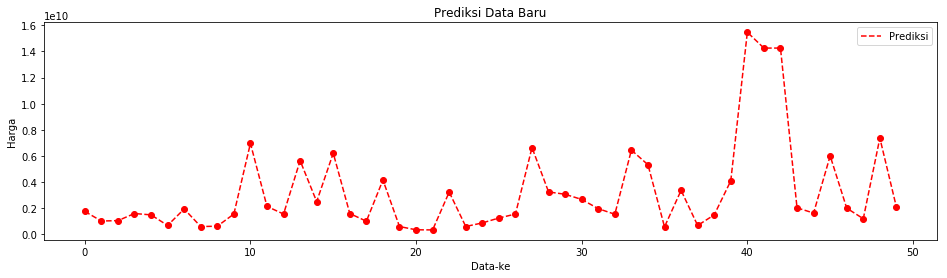

In [20]:
t = np.arange(yhat_predict.shape[0])

plt.figure(figsize=(16,4))
plt.title('Prediksi Data Baru')
plt.plot(t[0:50], yhat_predict[0:50], 'ro')
plt.plot(t[0:50], yhat_predict[0:50], 'r--', label='Prediksi')
plt.xlabel('Data-ke', fontsize=10)
plt.ylabel('Harga', fontsize=10)
plt.legend()
plt.show()

In [81]:
tanah = float(input('Luas Tanah (m2): '))
bangunan = float(input('Luas Bangunan (m2): '))
kamar = float(input('Jumlah Kamar: '))
wc = float(input('Jumlah WC: '))

X_new = [[tanah,bangunan,kamar,wc]]
scaler.transform(X_new)

yhat_new = clf.predict(X_new)

print(' ')
print('Prediksi Harga Rumah: Rp.', yhat_new[0])

Luas Tanah (m2): 250
Luas Bangunan (m2): 150
Jumlah Kamar: 3
Jumlah WC: 2
 
Prediksi Harga Rumah: Rp. 2690743008.5297165
